<a href="https://colab.research.google.com/github/Giriankur/Project_06/blob/main/Store_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# data load
Store_data = pd.read_csv('/content/Task_002_data.csv')
Store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
### Nan values Replace to 0
Store_data.fillna(0, inplace=True)


In [4]:
Store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [5]:
#labelencoder
from sklearn.preprocessing import LabelEncoder
categorical_cols = []
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [6]:
# Dataset with categorical columns
data_categorical = Store_data.select_dtypes(include=['object'])

# Dataset with numerical columns
data_numerical = Store_data.select_dtypes(include=['number'])


In [7]:
# Get lists of column names
categorical_columns = data_categorical.columns.tolist()
numerical_columns = data_numerical.columns.tolist()

# the shorter list with None
max_length = max(len(categorical_columns), len(numerical_columns))
categorical_columns += [None] * (max_length - len(categorical_columns))
numerical_columns += [None] * (max_length - len(numerical_columns))

# Create the new DataFrame
data = {
    'categorical_columns': categorical_columns,
    'numerical_columns': numerical_columns
}

df = pd.DataFrame(data)
print(df)

  categorical_columns          numerical_columns
0           StoreType                      Store
1          Assortment        CompetitionDistance
2       PromoInterval  CompetitionOpenSinceMonth
3                None   CompetitionOpenSinceYear
4                None                     Promo2
5                None            Promo2SinceWeek
6                None            Promo2SinceYear


In [8]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['categorical_columns', 'numerical_columns'])

# Print the encoded DataFrame
print(df_encoded)

   categorical_columns_Assortment  categorical_columns_PromoInterval  \
0                           False                              False   
1                            True                              False   
2                           False                               True   
3                           False                              False   
4                           False                              False   
5                           False                              False   
6                           False                              False   

   categorical_columns_StoreType  numerical_columns_CompetitionDistance  \
0                           True                                  False   
1                          False                                   True   
2                          False                                  False   
3                          False                                  False   
4                          False                

In [9]:
Store_data.shape

(1115, 10)

In [10]:
# Model implements
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [11]:
numerical_columns = Store_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [12]:
from re import X
X = Store_data.drop('Promo2', axis=1)
y = Store_data['Promo2']

In [13]:
# One-hot encoding of categorical variables
X = pd.get_dummies(X, drop_first=True)


In [14]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predictions
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0
R-squared: 1.0


In [15]:
!pip install --upgrade scikit-learn

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Random Forest is one of the most popular bagging **algorithms**

In [18]:
# Create and fit a Random Forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


###AdaBoost (Adaptive Boosting) is a commonly used boosting algorithm

In [19]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Create and fit an AdaBoost model
base_model = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=base_model, n_estimators=50)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [23]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       108

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [33]:
data = pd.DataFrame({
    'date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'])

})

#  datetime features
data['weekday'] = data['date'].dt.dayofweek  # Monday=0, Sunday=6
data['is_weekend'] = data['weekday'].isin([5, 6]).astype(int)  # Weekend: Saturday=5, Sunday=6

# holiday adjust based on actual holiday
holidays = pd.to_datetime(['2023-12-25', '2024-01-01'])

# day to the next holiday
data['days_to_next_holiday'] = data['date'].apply(lambda x: (holidays - x).days[(holidays - x).days > 0].min() if (holidays - x).days[(holidays - x).days > 0].size > 0 else np.nan)

# Day after the previous holiday
data['days_after_prev_holiday'] = data['date'].apply(lambda x: (x - holidays).days[(x - holidays).days > 0].min() if (x - holidays).days[(x - holidays).days > 0].size > 0 else np.nan)

# Identifying beginning, mid, and end of the month
data['month_period'] = pd.cut(data['date'].dt.day, bins=[0, 10, 20, 31], labels=['Beginning', 'Mid', 'End'])

# Week of the year
data['week_of_year'] = data['date'].dt.isocalendar().week
# Day of the month
data['day_of_month'] = data['date'].dt.day

# Week of the month (1 to 5)
data['week_of_month'] = data['date'].apply(lambda x: (x.day - 1) // 7 + 1)

# Quarter of the year
data['quarter'] = data['date'].dt.quarter

# Is the month end
data['is_month_end'] = data['date'].dt.is_month_end.astype(int)

print(data)

        date  weekday  is_weekend  days_to_next_holiday  \
0 2023-01-01        6           1                   358   
1 2023-01-02        0           0                   357   
2 2023-01-03        1           0                   356   
3 2023-01-04        2           0                   355   
4 2023-01-05        3           0                   354   

   days_after_prev_holiday month_period  week_of_year  day_of_month  \
0                      NaN    Beginning            52             1   
1                      NaN    Beginning             1             2   
2                      NaN    Beginning             1             3   
3                      NaN    Beginning             1             4   
4                      NaN    Beginning             1             5   

   week_of_month  quarter  is_month_end  
0              1        1             0  
1              1        1             0  
2              1        1             0  
3              1        1             0  
4       

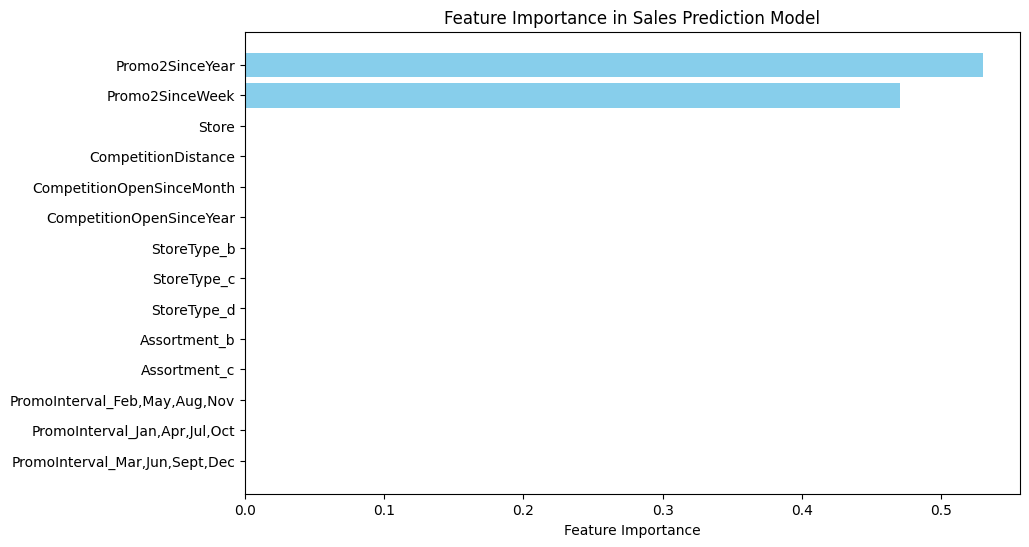

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# RandomForest model and features X_train, y_train
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# feature importances
feature_importances = model.feature_importances_
features = X_train.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Sales Prediction Model')
plt.gca().invert_yaxis()
plt.show()

In [29]:
from sklearn.utils import resample

# Parameters for bootstrapping
n_iterations = 100
confidence_level = 0.95
#  store predictions
bootstrap_predictions = []

# Perform bootstrapping
for i in range(n_iterations):

    X_test_resampled, y_test_resampled = resample(X_test, y_test, random_state=i)

    #predictions for the resampled test set
    y_pred_resampled = model.predict(X_test_resampled)
    bootstrap_predictions.append(y_pred_resampled)

# predictions to a numpy array for easier manipulation
bootstrap_predictions = np.array(bootstrap_predictions)

# Calculate the confidence interval
lower_bound = np.percentile(bootstrap_predictions, (1 - confidence_level) / 2 * 100, axis=0)
upper_bound = np.percentile(bootstrap_predictions, (1 + confidence_level) / 2 * 100, axis=0)

for i in range(5):
    print(f"Prediction {i+1}:")
    print(f"  Point Estimate: {model.predict(X_test.iloc[[i]])[0]:.2f}")
    print(f"  {confidence_level * 100:.0f}% Confidence Interval: [{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]")


Prediction 1:
  Point Estimate: 1.00
  95% Confidence Interval: [0.00, 1.00]
Prediction 2:
  Point Estimate: 1.00
  95% Confidence Interval: [0.00, 1.00]
Prediction 3:
  Point Estimate: 0.00
  95% Confidence Interval: [0.00, 1.00]
Prediction 4:
  Point Estimate: 0.00
  95% Confidence Interval: [0.00, 1.00]
Prediction 5:
  Point Estimate: 0.00
  95% Confidence Interval: [0.00, 1.00]


In [30]:
import pickle
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
# Train a model (for example purposes)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# the current timestamp in the specified format
timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")

# the store_file with the timestamp
store_file = f"model_{timestamp}.pkl"

# Serialize and save the model
with open(store_file, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as: {store_file}")

Model saved as: model_01-11-2024-21-33-55-456775.pkl


In [31]:
with open(store_file, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)
print(predictions)


[1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1.]
